In [2]:
!pip install git+https://github.com/ComputationalCryoEM/ASPIRE-Python.git
!git clone https://github.com/ComputationalCryoEM/ASPIRE-Python.git
%cd ASPIRE-Python

  Cloning https://github.com/ComputationalCryoEM/ASPIRE-Python.git to /tmp/pip-req-build-5cq61117
  Running command git clone --filter=blob:none --quiet https://github.com/ComputationalCryoEM/ASPIRE-Python.git /tmp/pip-req-build-5cq61117
  Resolved https://github.com/ComputationalCryoEM/ASPIRE-Python.git to commit f8f26eed4a30a1c8b0383ab4ff543e40b6a5491f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 48.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 66.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 112.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.2 MB/s eta 0:00:00
  Created wheel for aspire: filename=aspire-0.14.0-py3-none-any.whl size=426485 sha256=0243ee5

In [3]:
!pip install mrcfile

# **ASPIRE's particle picking methods using the ``Apple Picker``**

2025-10-02 12:24:49,099 INFO [numexpr.utils] NumExpr defaulting to 4 threads.


DEBUG:2025-10-02 12:24:53,007:jax._src.path:31: etils.epath found. Using etils.epath for file I/O.
2025-10-02 12:25:00.557960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759407900.794571      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759407900.860884      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


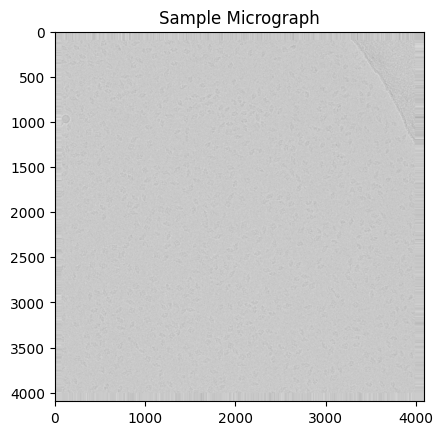

In [4]:
import os
import matplotlib.pyplot as plt
import mrcfile
from aspire.apple.apple import Apple

file_path = os.path.join(
    os.path.dirname(os.getcwd()), "/kaggle/working/ASPIRE-Python/gallery/tutorials/data", "/kaggle/working/ASPIRE-Python/gallery/tutorials/data/falcon_2012_06_12-14_33_35_0.mrc"
)

with mrcfile.open(file_path, mode="r") as mrc:
    micro_img = mrc.data

plt.title("Sample Micrograph")
plt.imshow(micro_img, cmap="gray")
plt.show()

In [5]:
plt.savefig("/kaggle/working/micro_img.png", dpi=300, bbox_inches="tight")
plt.close()

2025-10-02 12:25:14,163 INFO [aspire.apple.picking] Classifier model desired = svm
2025-10-02 12:25:14,164 INFO [aspire.apple.picking] Using SVM Classifier
2025-10-02 12:25:14,165 INFO [aspire.apple.apple] Computing scores for query images
2025-10-02 12:25:14,166 INFO [aspire.apple.picking] Extracting query images
2025-10-02 12:25:14,276 INFO [aspire.apple.picking] Extracting query images complete


100%|██████████| 256/256 [00:52<00:00,  4.86it/s]

2025-10-02 12:26:08,104 INFO [aspire.apple.apple] Running svm with tau1=710, tau2=7100


2025-10-02 12:26:16,335 INFO [aspire.apple.apple] Discarding suspected artifacts
2025-10-02 12:26:24,463 INFO [aspire.apple.apple] Getting particle centers
Dimensions of the micrograph are (4096, 4096)
461 particles were picked


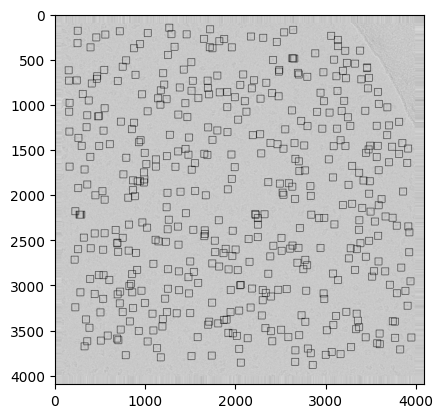

In [6]:

apple_picker = Apple(
    particle_size=78, min_particle_size=19, max_particle_size=156, tau1=710, tau2=7100
)


centers, particles_img = apple_picker.process_micrograph(file_path, create_jpg=True)

img_dim = micro_img.shape
particles = centers.shape[0]
print(f"Dimensions of the micrograph are {img_dim}")
print(f"{particles} particles were picked")

# sphinx_gallery_thumbnail_number = 2
plt.imshow(particles_img, cmap="gray")
plt.show()

**First 10 particle plots**

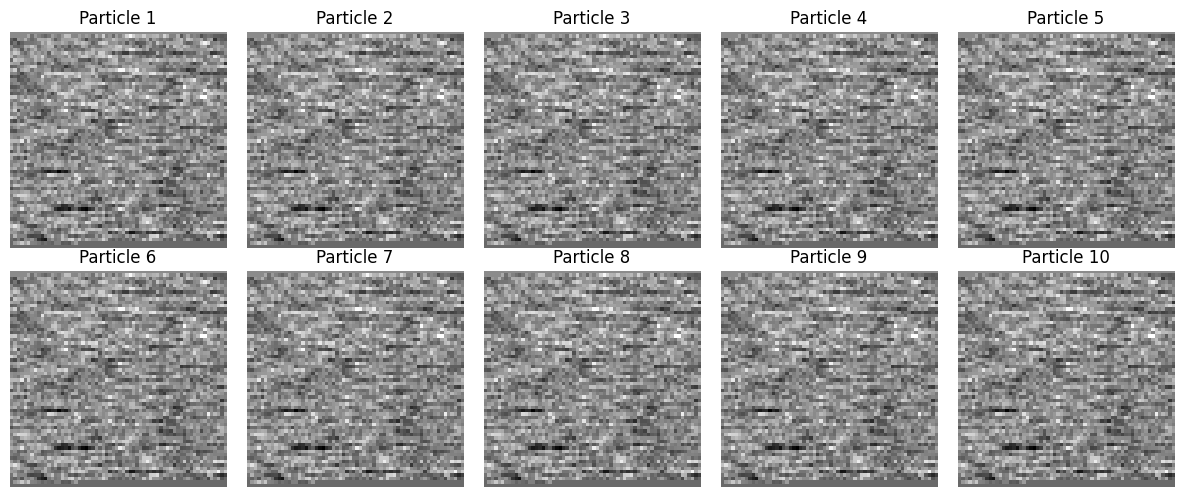

In [8]:
box_size = int(particles_img.shape[1] ** 0.5)  # infer box size from length

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, ax in enumerate(axes.ravel()):
    particle = particles_img[i].reshape(box_size, box_size)
    ax.imshow(particle, cmap="gray")
    ax.set_title(f"Particle {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()
